<a href="https://colab.research.google.com/github/aynaval/nyc-taxi-trip-duration-predicton/blob/main/NYC_Taxi_Trip_Time_Prediction_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Taxi trip time Prediction : Predicting total ride duration of taxi trips in New York City</u></b>

## <b> Problem Description </b>

### Your task is to build a model that predicts the total ride duration of taxi trips in New York City. Your primary dataset is one released by the NYC Taxi and Limousine Commission, which includes pickup time, geo-coordinates, number of passengers, and several other variables.

## <b> Data Description </b>

### The dataset is based on the 2016 NYC Yellow Cab trip record data made available in Big Query on Google Cloud Platform. The data was originally published by the NYC Taxi and Limousine Commission (TLC). The data was sampled and cleaned for the purposes of this project. Based on individual trip attributes, you should predict the duration of each trip in the test set.

### <b>NYC Taxi Data.csv</b> - the training set (contains 1458644 trip records)


### Data fields
* #### id - a unique identifier for each trip
* #### vendor_id - a code indicating the provider associated with the trip record
* #### pickup_datetime - date and time when the meter was engaged
* #### dropoff_datetime - date and time when the meter was disengaged
* #### passenger_count - the number of passengers in the vehicle (driver entered value)
* #### pickup_longitude - the longitude where the meter was engaged
* #### pickup_latitude - the latitude where the meter was engaged
* #### dropoff_longitude - the longitude where the meter was disengaged
* #### dropoff_latitude - the latitude where the meter was disengaged
* #### store_and_fwd_flag - This flag indicates whether the trip record was held in vehicle memory before sending to the vendor because the vehicle did not have a connection to the server - Y=store and forward; N=not a store and forward trip
* #### trip_duration - duration of the trip in seconds

In [149]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_columns", 36)
plt.style.use('seaborn')

plt.rcParams["font.weight"] = "bold"
plt.rcParams["axes.labelweight"] = "bold"
plt.rcParams["axes.titlesize"] = 25
plt.rcParams["axes.titleweight"] = 'bold'
plt.rcParams['xtick.labelsize']=15
plt.rcParams['ytick.labelsize']=15
plt.rcParams["axes.labelsize"] = 20
plt.rcParams["legend.fontsize"] = 15
plt.rcParams["legend.title_fontsize"] = 15
plt.rcParams['figure.figsize'] = [15, 10]
from geopy.distance import great_circle



In [150]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [151]:
data = pd.read_csv('/content/drive/MyDrive/NYC Taxi Trip Time Prediction - Lavanya M/Copy of NYC Taxi Data.csv')

# **EDA**

In [152]:
# !pip install pandas-profiling==2.7.1
# from pandas_profiling import ProfileReport
# prof = ProfileReport(data)
# prof.to_file(output_file='output.html')

In [153]:
data.head()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
0,id2875421,2,2016-03-14 17:24:55,2016-03-14 17:32:30,1,-73.982155,40.767937,-73.964630,40.765602,N,455
1,id2377394,1,2016-06-12 00:43:35,2016-06-12 00:54:38,1,-73.980415,40.738564,-73.999481,40.731152,N,663
2,id3858529,2,2016-01-19 11:35:24,2016-01-19 12:10:48,1,-73.979027,40.763939,-74.005333,40.710087,N,2124
3,id3504673,2,2016-04-06 19:32:31,2016-04-06 19:39:40,1,-74.010040,40.719971,-74.012268,40.706718,N,429
4,id2181028,2,2016-03-26 13:30:55,2016-03-26 13:38:10,1,-73.973053,40.793209,-73.972923,40.782520,N,435


In [154]:
data.tail()

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
1458639,id2376096,2,2016-04-08 13:31:04,2016-04-08 13:44:02,4,-73.982201,40.745522,-73.994911,40.740170,N,778
1458640,id1049543,1,2016-01-10 07:35:15,2016-01-10 07:46:10,1,-74.000946,40.747379,-73.970184,40.796547,N,655
1458641,id2304944,2,2016-04-22 06:57:41,2016-04-22 07:10:25,1,-73.959129,40.768799,-74.004433,40.707371,N,764
1458642,id2714485,1,2016-01-05 15:56:26,2016-01-05 16:02:39,1,-73.982079,40.749062,-73.974632,40.757107,N,373
1458643,id1209952,1,2016-04-05 14:44:25,2016-04-05 14:47:43,1,-73.979538,40.781750,-73.972809,40.790585,N,198


In [155]:
data.sample(3)

,id,vendor_id,pickup_datetime,dropoff_datetime,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,store_and_fwd_flag,trip_duration
129763,id1659766,1,2016-05-13 15:50:18,2016-05-13 16:00:53,2,-73.955109,40.783058,-73.946800,40.777405,N,635
649414,id2539119,1,2016-03-24 14:57:02,2016-03-24 15:36:32,1,-73.862823,40.769104,-73.970047,40.757370,N,2370
1115718,id1814640,1,2016-03-21 19:59:03,2016-03-21 20:15:25,1,-73.991898,40.750153,-73.964745,40.764736,N,982


In [156]:
data.shape

(1458644, 11)

In [157]:
data.size

16045084

In [158]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1458644 entries, 0 to 1458643
Data columns (total 11 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   id                  1458644 non-null  object 
 1   vendor_id           1458644 non-null  int64  
 2   pickup_datetime     1458644 non-null  object 
 3   dropoff_datetime    1458644 non-null  object 
 4   passenger_count     1458644 non-null  int64  
 5   pickup_longitude    1458644 non-null  float64
 6   pickup_latitude     1458644 non-null  float64
 7   dropoff_longitude   1458644 non-null  float64
 8   dropoff_latitude    1458644 non-null  float64
 9   store_and_fwd_flag  1458644 non-null  object 
 10  trip_duration       1458644 non-null  int64  
dtypes: float64(4), int64(3), object(4)
memory usage: 122.4+ MB


In [159]:
data.describe()

,vendor_id,passenger_count,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,trip_duration
count,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06,1.458644e+06
mean,1.534950e+00,1.664530e+00,-7.397349e+01,4.075092e+01,-7.397342e+01,4.075180e+01,9.594923e+02
std,4.987772e-01,1.314242e+00,7.090186e-02,3.288119e-02,7.064327e-02,3.589056e-02,5.237432e+03
min,1.000000e+00,0.000000e+00,-1.219333e+02,3.435970e+01,-1.219333e+02,3.218114e+01,1.000000e+00
25%,1.000000e+00,1.000000e+00,-7.399187e+01,4.073735e+01,-7.399133e+01,4.073588e+01,3.970000e+02
50%,2.000000e+00,1.000000e+00,-7.398174e+01,4.075410e+01,-7.397975e+01,4.075452e+01,6.620000e+02
75%,2.000000e+00,2.000000e+00,-7.396733e+01,4.076836e+01,-7.396301e+01,4.076981e+01,1.075000e+03
max,2.000000e+00,9.000000e+00,-6.133553e+01,5.188108e+01,-6.133553e+01,4.392103e+01,3.526282e+06


* Minimum value of trip duration is 1 secound and max is 3526282 (approx 40 days).


In [160]:
data.nunique()

id                    1458644
vendor_id                   2
pickup_datetime       1380222
dropoff_datetime      1380377
passenger_count            10
pickup_longitude        23047
pickup_latitude         45245
dropoff_longitude       33821
dropoff_latitude        62519
store_and_fwd_flag          2
trip_duration            7417
dtype: int64

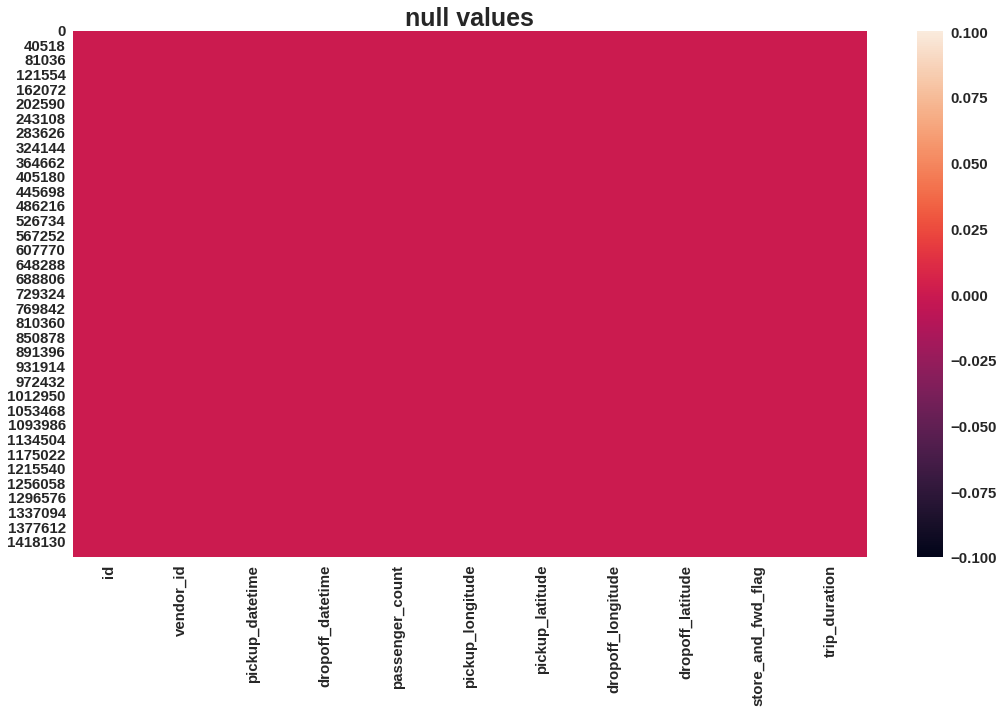

In [161]:
sns.heatmap(data.isnull());
plt.title('null values')
plt.tight_layout()

* There are no missing values in the data.

In [162]:
data.duplicated().value_counts()

False    1458644
dtype: int64

* There are no duplicate values.

## **Distribution**

### Categorical columns

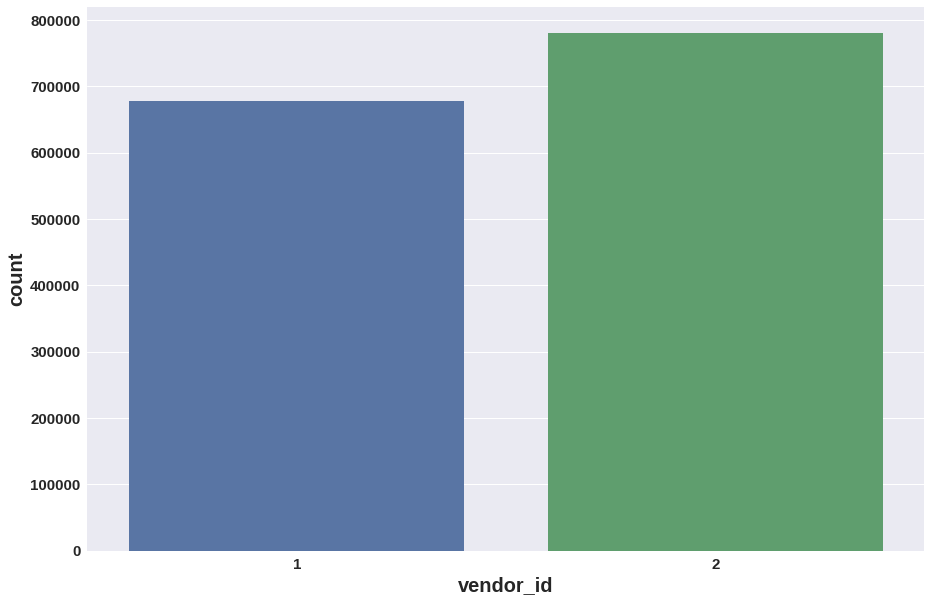

In [163]:
sns.countplot(data=data,x='vendor_id');


* There is almost equal ratio of both vendors.

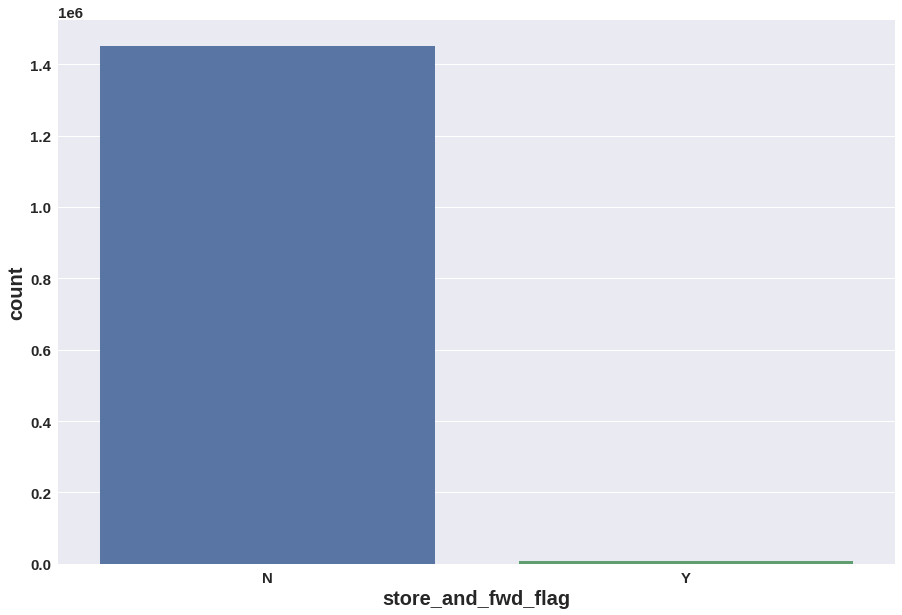

In [164]:
sns.countplot(data=data,x='store_and_fwd_flag');


* Only few records were recored in memory before sharing(Y).

### Numerical columns

* Pickup_datatime and dropoff datetime were both on onject data type, they are converted to datetime object to understand the data more.

In [165]:
data['pickup_datetime'] = pd.to_datetime(data['pickup_datetime'])

In [166]:
data['dropoff_datetime'] = pd.to_datetime(data['dropoff_datetime'])

In [167]:
print(data['pickup_datetime'].dt.year.unique(),data['dropoff_datetime'].dt.year.unique())

[2016] [2016]


* Both pick up and and drop off columns have same year hence it year can be ignored.

In [168]:
(data['pickup_datetime'].dt.month.unique(),data['dropoff_datetime'].dt.month.unique())

(array([3, 6, 1, 4, 5, 2]), array([3, 6, 1, 4, 5, 2, 7]))

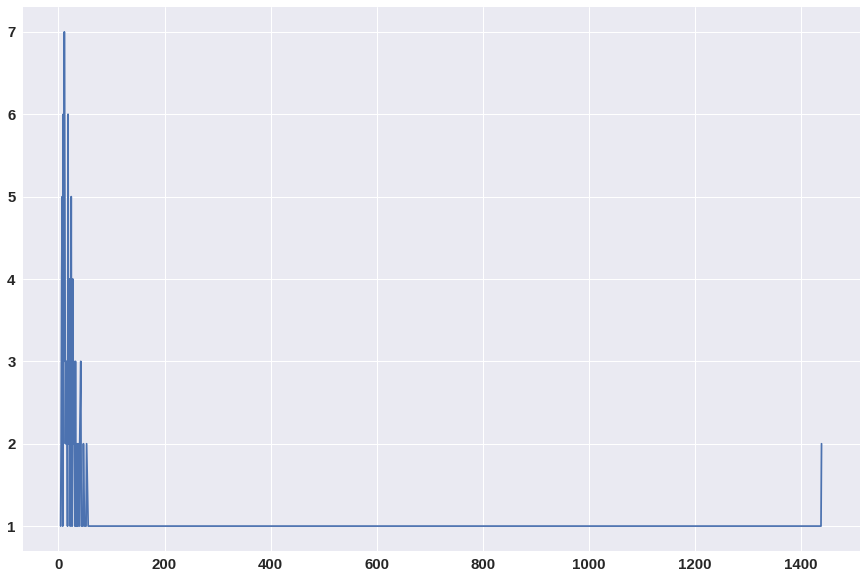

In [169]:
(data[data['dropoff_datetime'].dt.month==7]['trip_duration']//60).value_counts().sort_index().plot();

In [170]:
data[data['dropoff_datetime'].dt.month==7][['pickup_datetime','dropoff_datetime']]

,pickup_datetime,dropoff_datetime
46600,2016-06-30 08:00:53,2016-07-01 07:46:38
54314,2016-06-30 23:42:19,2016-07-01 00:01:12
59891,2016-06-30 16:37:52,2016-07-01 16:37:39
77419,2016-06-30 23:51:36,2016-07-01 00:01:20
115092,2016-06-30 23:47:29,2016-07-01 00:08:00
...,...,...
1405631,2016-06-30 23:30:36,2016-07-01 00:04:42
1409028,2016-06-30 23:46:10,2016-07-01 00:12:44
1414667,2016-06-30 23:46:53,2016-07-01 00:07:41
1415134,2016-06-30 23:46:26,2016-07-01 00:16:24


* dropoff_datetime has a extra month compared to pickup_datetime column with only 127 observatons when dropoff_datetime month is 7. 
* Observations when dropoff_datetime month is 7 is from the rides which were mostly taken at late-night of pickup_datetime month 6.
* Most rides were under 30 secounds.

In [171]:
((data['dropoff_datetime']-data['pickup_datetime']).dt.total_seconds().astype(int) == data['trip_duration']).value_counts() 

True    1458644
dtype: int64

* Drop off column can be dropped as (drop off - pick up) = trip duration.

In [172]:
data.drop('dropoff_datetime',axis =1,inplace= True)

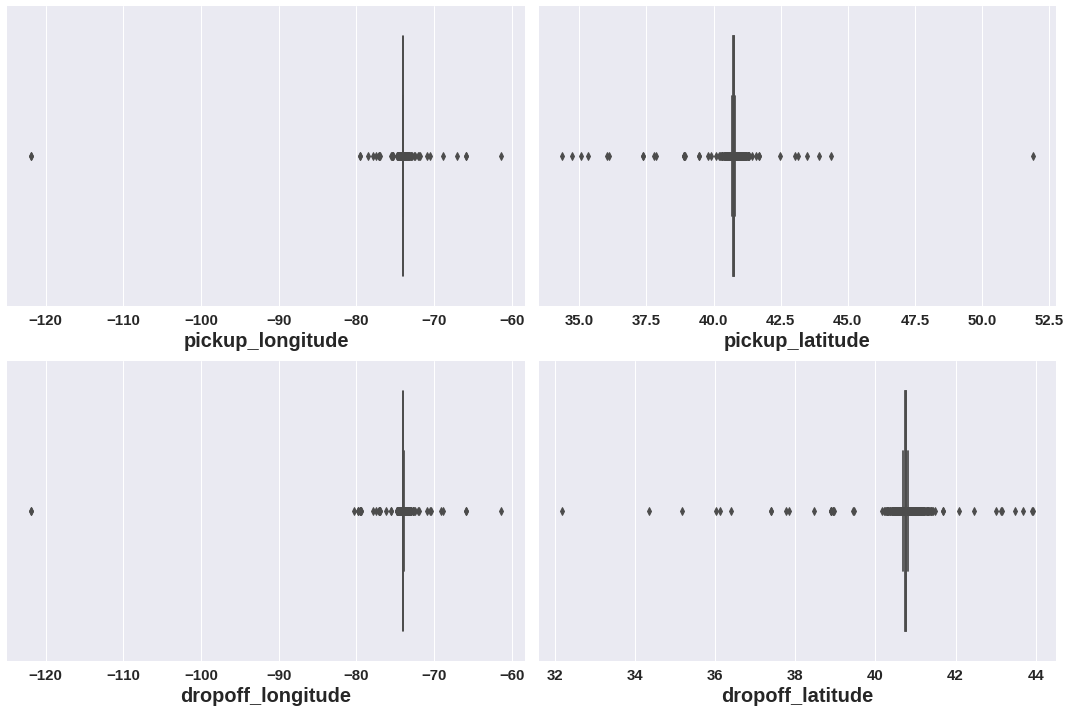

In [173]:
plt.figure(figsize=(15,10))
n =1;
for i in ['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude']:
  plt.subplot(2,2,n)
  sns.boxplot(data[i])
  n+=1
plt.tight_layout()

There are logitude and latitude co-ordinates which are out of new york city.

> * city_long_border = (-74.03, -73.75)
* city_lat_border = (40.63, 40.85)



In [174]:


# dropping outliers
data = data[data['pickup_longitude'] <= -73.75]
data = data[data['pickup_longitude'] >= -74.03]
data = data[data['pickup_latitude'] <= 40.85]
data = data[data['pickup_latitude'] >= 40.63]
data = data[data['dropoff_longitude'] <= -73.75]
data = data[data['dropoff_longitude'] >= -74.03]
data = data[data['dropoff_latitude'] <= 40.85]
data = data[data['dropoff_latitude'] >= 40.63]

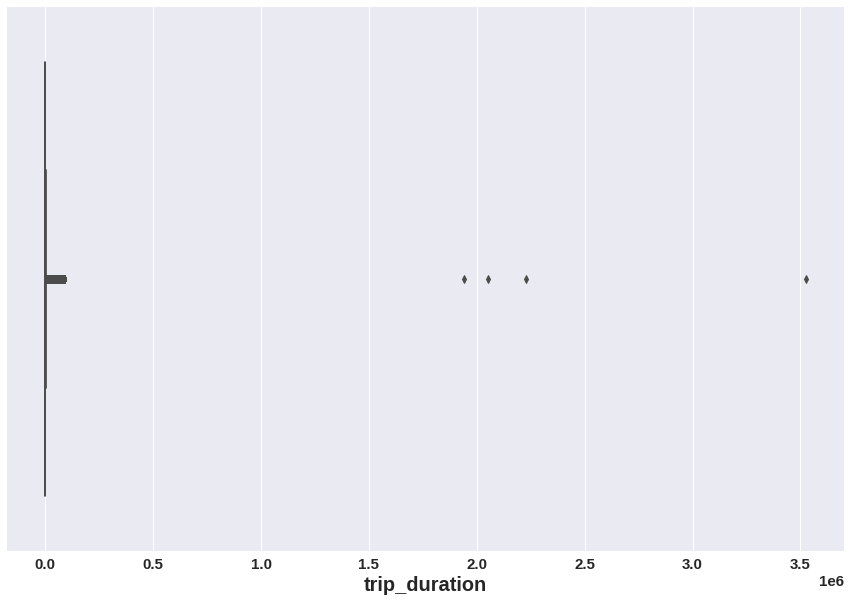

In [175]:
sns.boxplot(data['trip_duration']);

In [176]:
data['trip_duration'].describe()

count    1.439183e+06
mean     9.462307e+02
std      5.251643e+03
min      1.000000e+00
25%      3.940000e+02
50%      6.560000e+02
75%      1.059000e+03
max      3.526282e+06
Name: trip_duration, dtype: float64

* Min values is 1 secound and max is 352682 secounds (ie. 4 days)
* Using 2 standared deviation after taking log10 of trip duration.

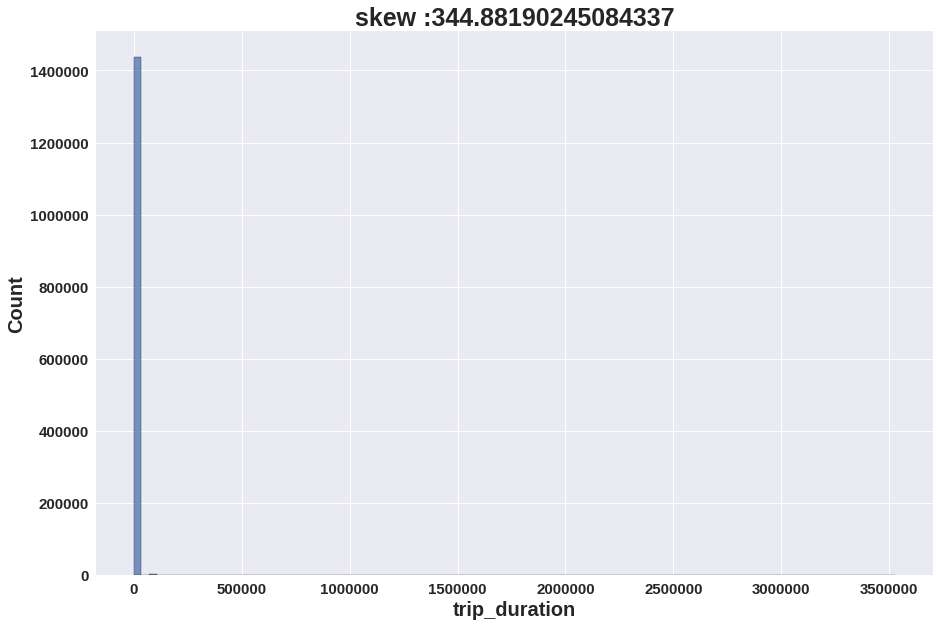

In [177]:

sns.histplot(data['trip_duration'],bins = 100)
plt.title('skew :'+str(data['trip_duration'].skew()))
plt.ticklabel_format(style='plain')


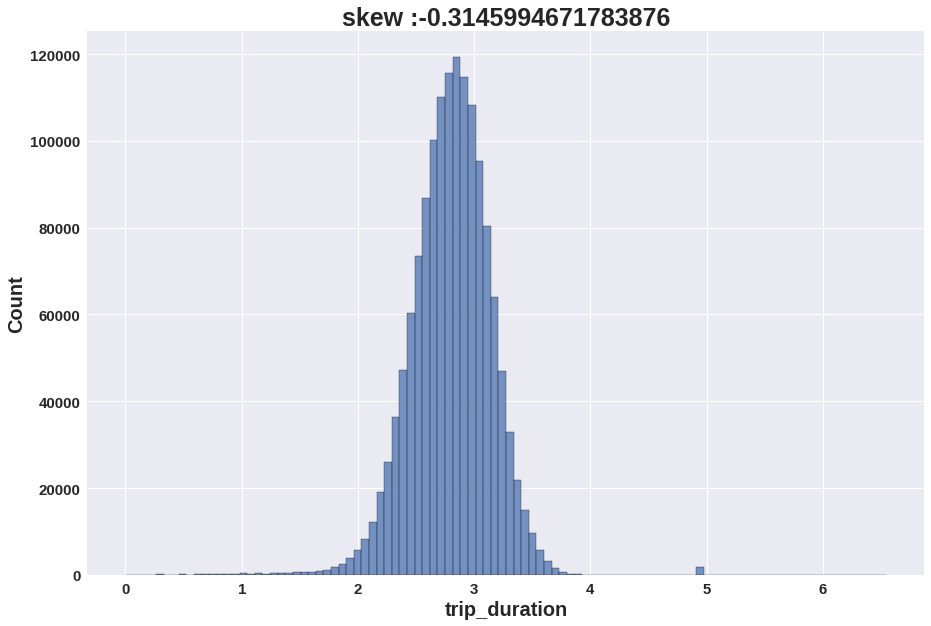

In [178]:
sns.histplot(np.log10(data['trip_duration']),bins=100);
plt.title('skew :'+str(np.log(data['trip_duration']).skew()));

In [179]:
data['log_trip_duration']= np.log10(data['trip_duration'])

In [180]:
data['log_trip_duration'].mean()- 3*data['log_trip_duration'].std()

1.7716915704097043

In [181]:
data = data[data['log_trip_duration']>(data['log_trip_duration'].mean()- 3*data['log_trip_duration'].std())]
data = data[data['log_trip_duration']<(data['log_trip_duration'].mean()+ 3*data['log_trip_duration'].std())]


In [182]:
data['month'] = data['pickup_datetime'].dt.month_name()

In [183]:
data['day_no'] = data['pickup_datetime'].dt.day

In [184]:
data['day'] = data['pickup_datetime'].dt.day_name()

In [185]:
data['hour'] = data['pickup_datetime'].dt.hour

In [186]:
data['minute'] = data['pickup_datetime'].dt.minute

In [187]:
data['second'] = data['pickup_datetime'].dt.second

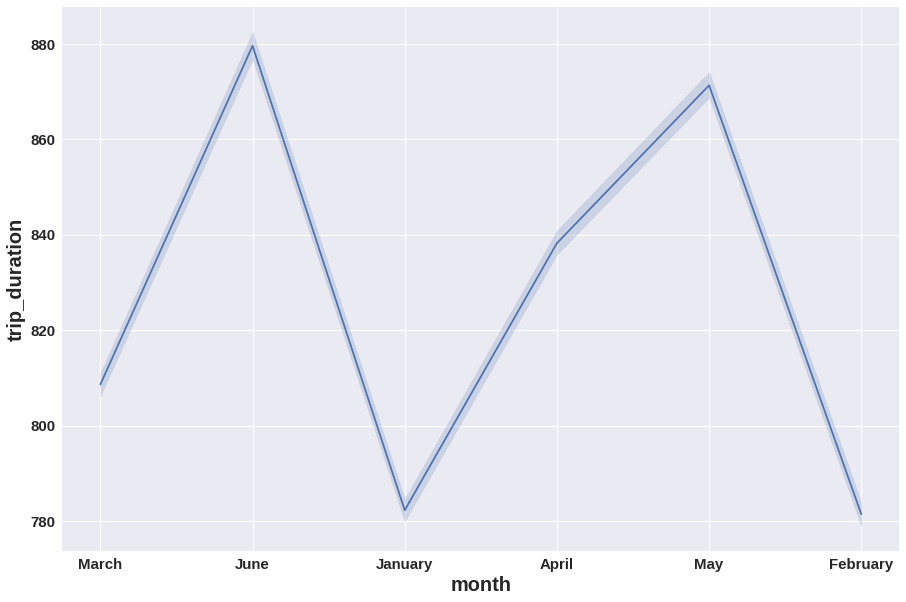

In [188]:

sns.lineplot(data=data,x='month',y='trip_duration');


* January has least time duration and June has the max trip duration.

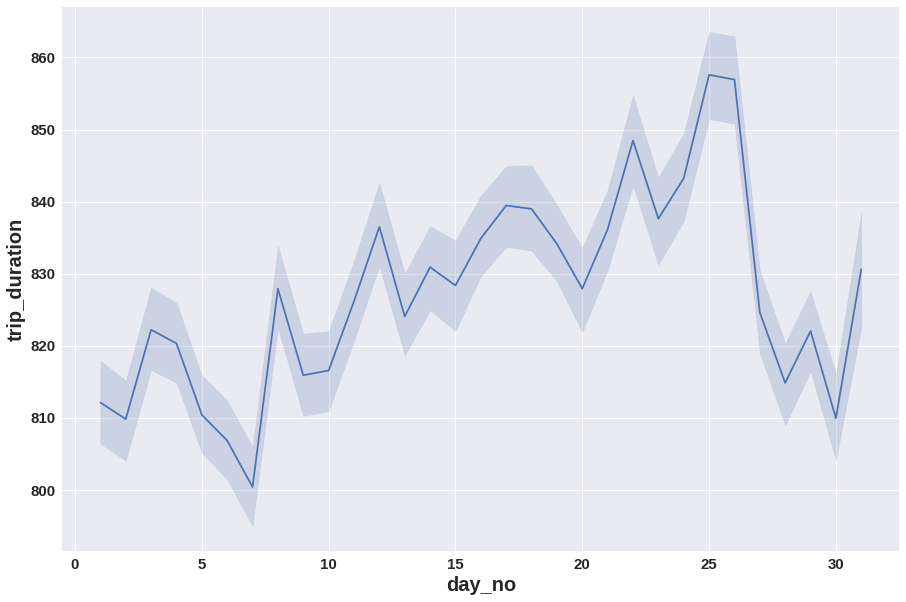

In [189]:
sns.lineplot(data=data,x='day_no',y='trip_duration' );

* Trip duration is lesser at beginning and ending of month while its hightest at around 25th day of the month.

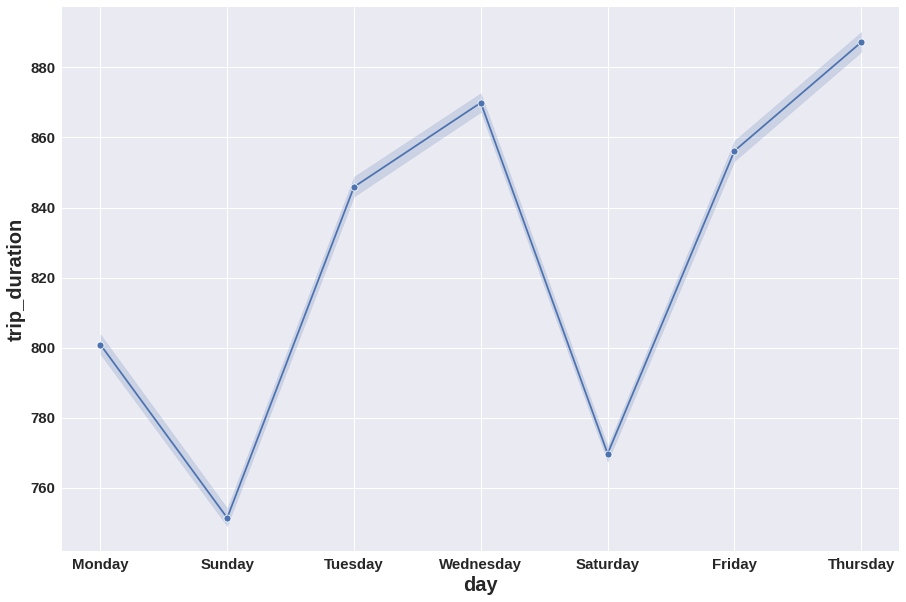

In [190]:
sns.lineplot(data=data,x='day',y='trip_duration',marker="o");

* Trip duration is least at weekends and max during Thursday.
* This trend follows for all months.

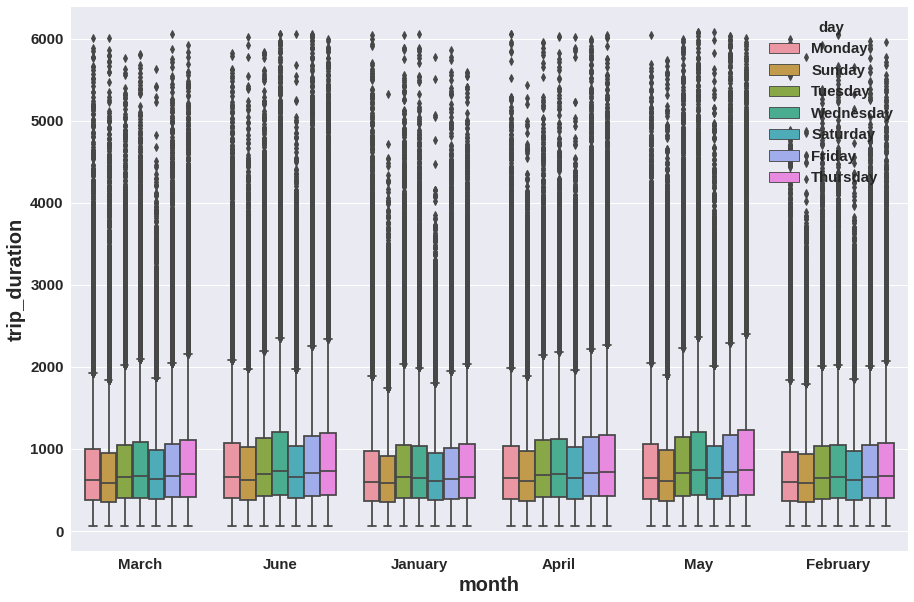

In [191]:
sns.boxplot(data=data,x='month',y='trip_duration',hue='day');

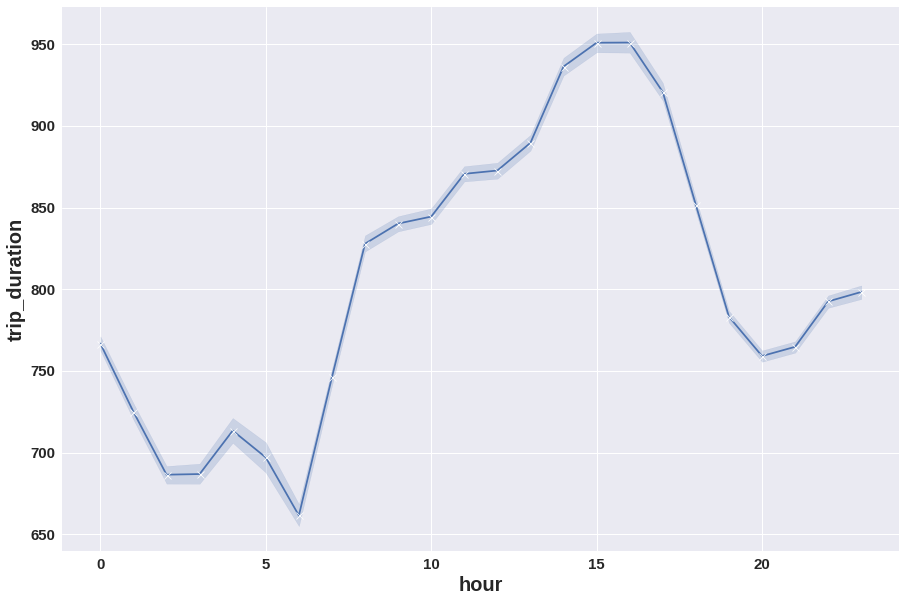

In [192]:
sns.lineplot(data=data,x='hour',y='trip_duration',marker="x");

* Trip duration is least at midnight to early morning(12am to 6am).
* Trip duration increases in morning after 6am till late afternoon 4 pm after which it starts.
* Highest trip duration is at around 3pm 

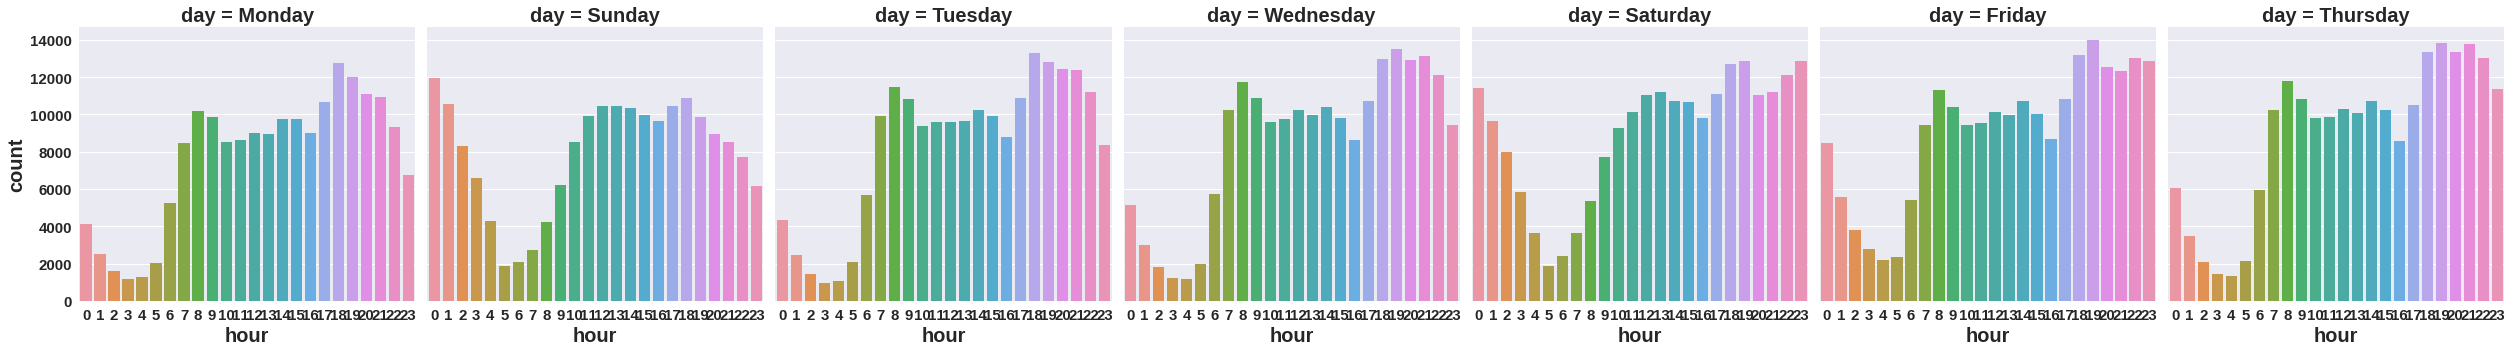

In [193]:
sns.catplot(data=data,kind='count',x='hour',col='day');
plt.tight_layout()

* On weekends people do travel at after midnight to early morning while during weekdays most people do not travel much at midnight.

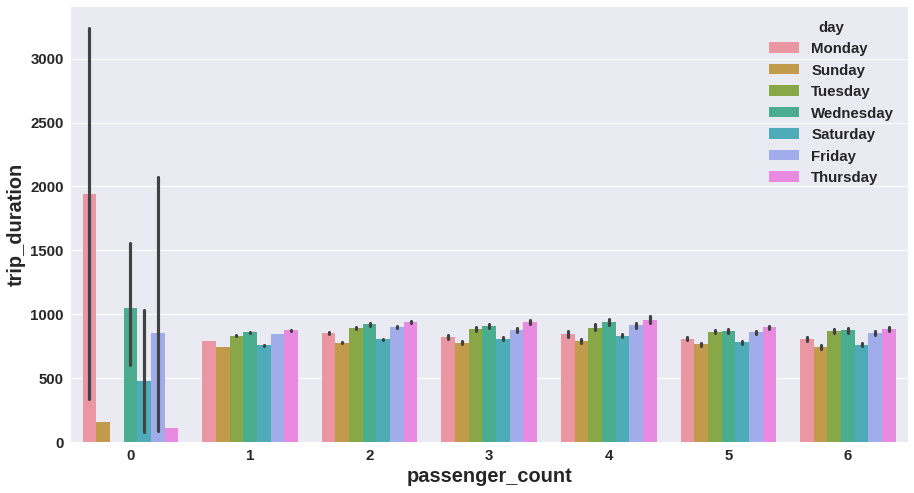

In [194]:
plt.figure(figsize=(15,8))
sns.barplot(data=data,x='passenger_count',y='trip_duration',hue='day');

* When 0 passanger trip durations are high which could have been outliers hence removing them.

In [195]:
len(data[data['passenger_count']==0])

14

In [196]:
 data = data[data['passenger_count']>0]

In [197]:
def distancer(row):
    coords_1 = (row['pickup_latitude'], row['pickup_longitude'])
    coords_2 = (row['dropoff_latitude'], row['dropoff_longitude'])
    return great_circle(coords_1, coords_2).km

data['pickup_dropoff_distance'] = data.apply(distancer, axis=1)

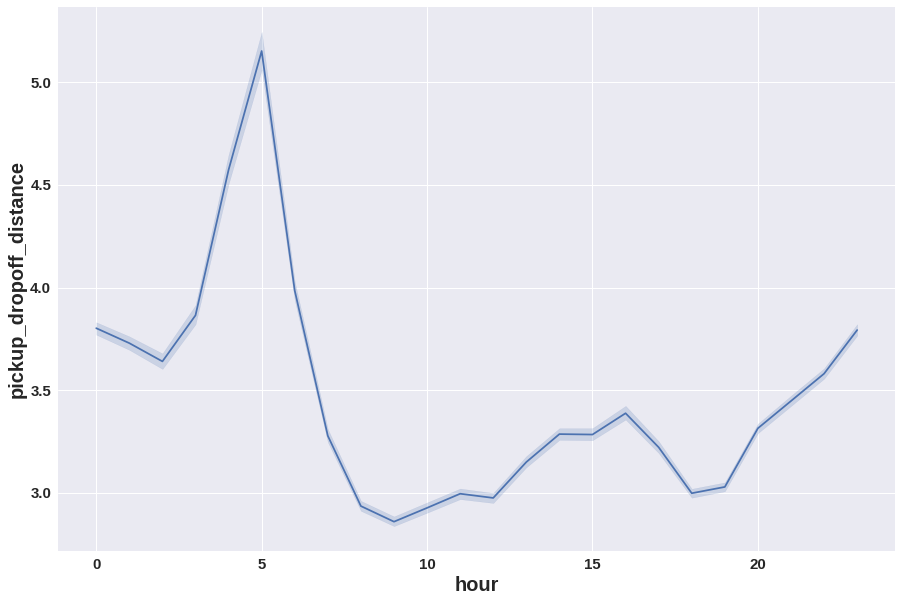

In [198]:
sns.lineplot(data=data,y='pickup_dropoff_distance',x='hour');

* Most distance is travelled at around 5 am and leasr at around 9 am.

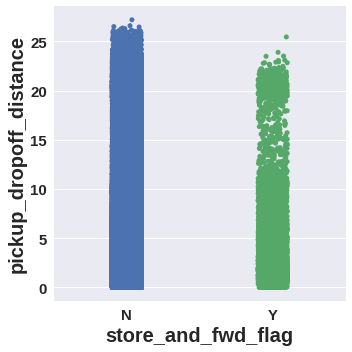

In [199]:
sns.catplot(data=data,x='store_and_fwd_flag',y='pickup_dropoff_distance');

* Its almost the same for both

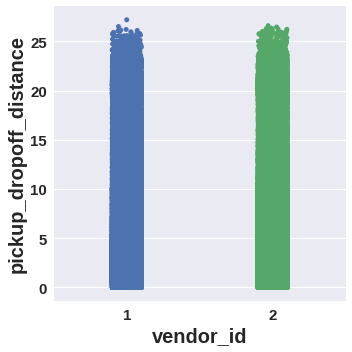

In [200]:
sns.catplot(data=data,x='vendor_id',y='pickup_dropoff_distance');

In [201]:
data['store_and_fwd_flag'] = data['store_and_fwd_flag'].map(dict(N=0,Y=1))

In [202]:
data = pd.get_dummies(data ,columns= ['month','day'],drop_first=True)

In [203]:
data.drop(['id','pickup_datetime','trip_duration'],axis=1,inplace=True)

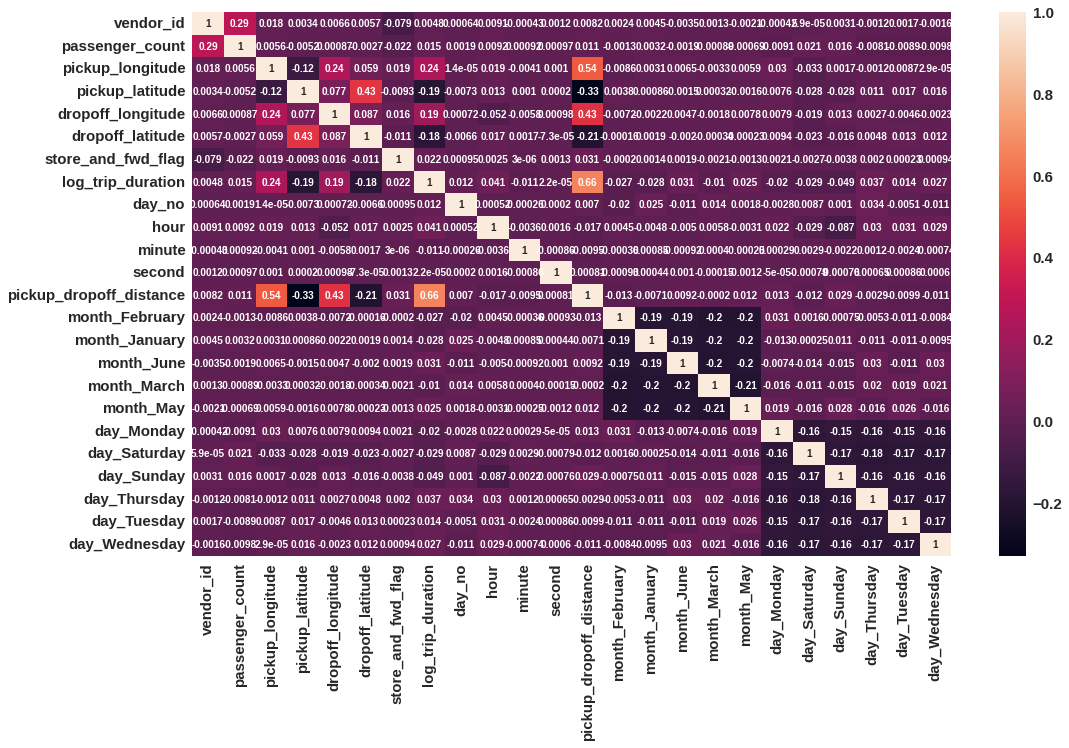

In [204]:
plt.figure(figsize=(17,10))
sns.heatmap(data.corr(),annot=True);

In [205]:
# ! pip install sweetviz

In [206]:
# import sweetviz as sv
# #You could specify which variable in your dataset is the target for your model creation. We can specify it using the target_feat parameter.
# my_report = sv.analyze(data, target_feat ='log_trip_duration')
# my_report.show_html()

In [207]:
scaler = MinMaxScaler()

In [208]:
data[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','day_no']]= scaler.fit_transform(data[['pickup_longitude', 'pickup_latitude','dropoff_longitude', 'dropoff_latitude','day_no']])

In [209]:
X = data.drop('log_trip_duration',axis = 1)

In [210]:
y = data.loc[:,'log_trip_duration']

In [211]:
from sklearn.model_selection import train_test_split

In [212]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [213]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1142946, 23), (285737, 23), (1142946,), (285737,))

In [214]:
data.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag',
       'log_trip_duration', 'day_no', 'hour', 'minute', 'second',
       'pickup_dropoff_distance', 'month_February', 'month_January',
       'month_June', 'month_March', 'month_May', 'day_Monday', 'day_Saturday',
       'day_Sunday', 'day_Thursday', 'day_Tuesday', 'day_Wednesday'],
      dtype='object')

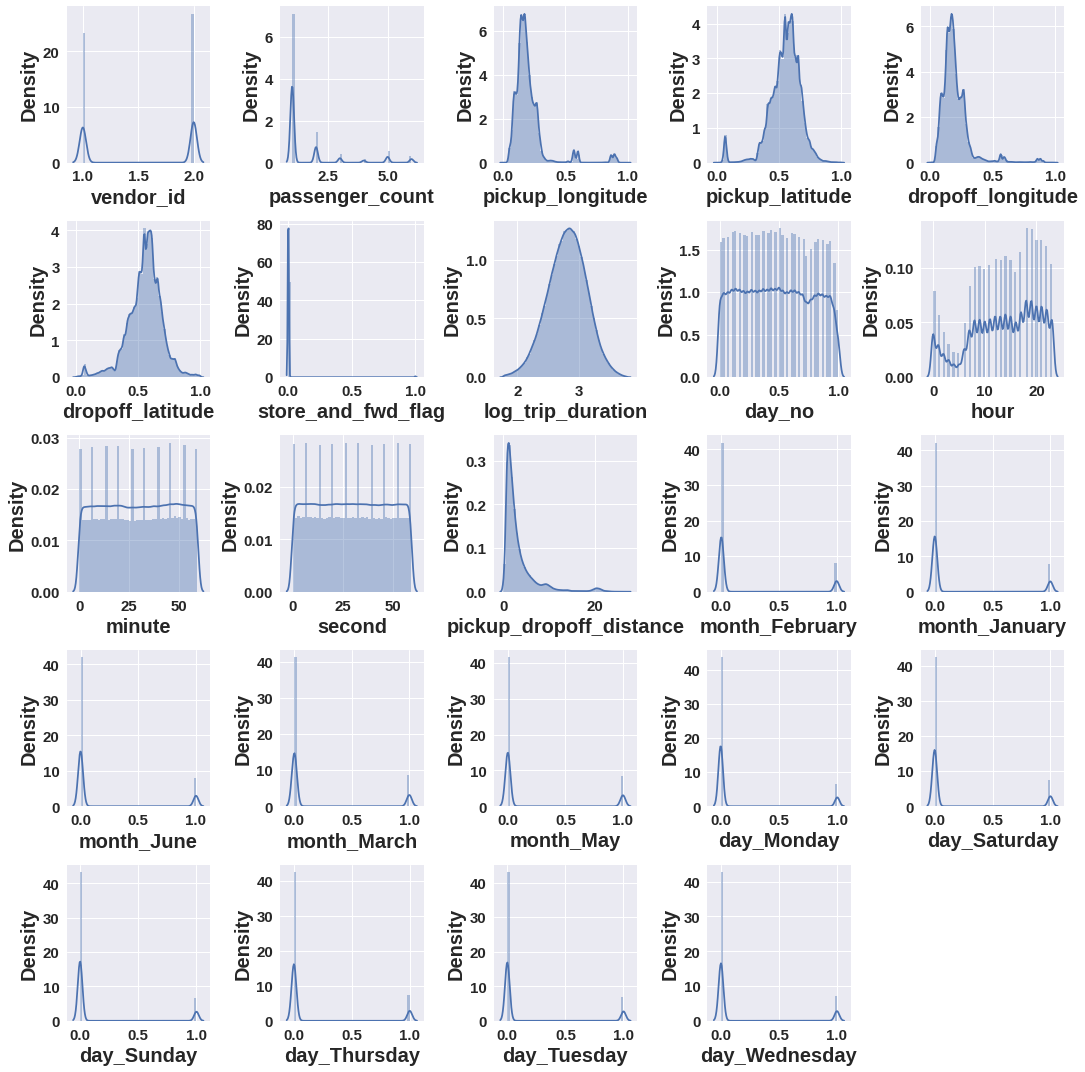

In [215]:
n=1
plt.figure(figsize=(15,15))
for i in data.columns:
  plt.subplot(5,5,n)
  sns.distplot(data[i])
  n=n+1
plt.tight_layout()


# **Linear regression**

In [216]:
from sklearn.linear_model import LinearRegression

In [217]:
lr = LinearRegression()

In [218]:
lr.fit(X_train,y_train)

LinearRegression()

In [219]:
lr.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [220]:
lr.coef_

array([-2.34476570e-04,  1.98469698e-03, -3.91841867e-01,  1.83088385e-01,
       -3.22024902e-01, -5.09011300e-02,  5.50070358e-03,  7.93830739e-03,
        2.18391484e-03, -8.39199398e-05, -1.34872016e-06,  7.07305833e-02,
       -1.90854177e-02, -2.28175324e-02,  9.44542562e-03, -1.64401233e-02,
        7.39196599e-03, -3.93325966e-02, -3.52498245e-02, -7.00126241e-02,
        1.04473583e-02, -9.74450007e-04,  7.69049302e-03])

In [221]:
y_pred_train_lr= lr.predict(X_train)

In [222]:
y_pred_test_lr = lr.predict(X_test)

In [223]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [224]:
# for train data
lr_train_mse  = mean_squared_error((y_train), (y_pred_train_lr))
print("Train MSE :" , lr_train_mse)

lr_train_rmse = np.sqrt(lr_train_mse)

print("Train RMSE :" ,lr_train_rmse)

lr_train_r2 = r2_score((y_train), (y_pred_train_lr))
print("Train R2 :" ,lr_train_r2) 

lr_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_lr)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 0.05107120243890582
Train RMSE : 0.2259893856775265
Train R2 : 0.48323325094637404
Train Adjusted R2 :  0.4832228516057119


In [225]:
lr_test_mse  = mean_squared_error((y_test), (y_pred_test_lr))
print("Test MSE :" , lr_test_mse)

lr_test_rmse = np.sqrt(lr_test_mse)

print("Test RMSE :" ,lr_test_rmse)

lr_test_r2 = r2_score((y_test), (y_pred_test_lr))
print("Test R2 :" ,lr_test_r2)

lr_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_lr)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 0.05087670291136038
Test RMSE : 0.22555864627932218
Test R2 : 0.48200153199598206
Test Adjusted R2 :  0.4819598329316619


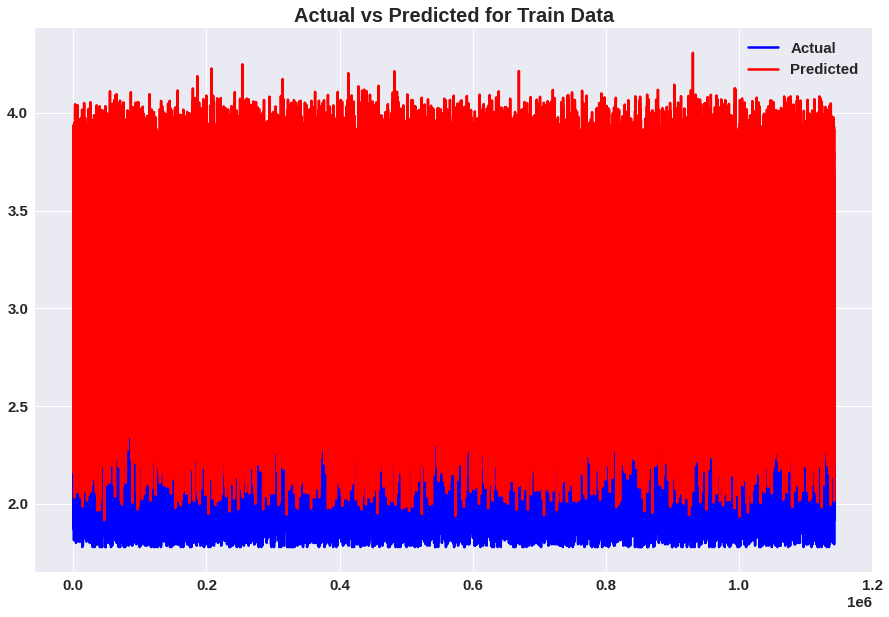

In [226]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_lr, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

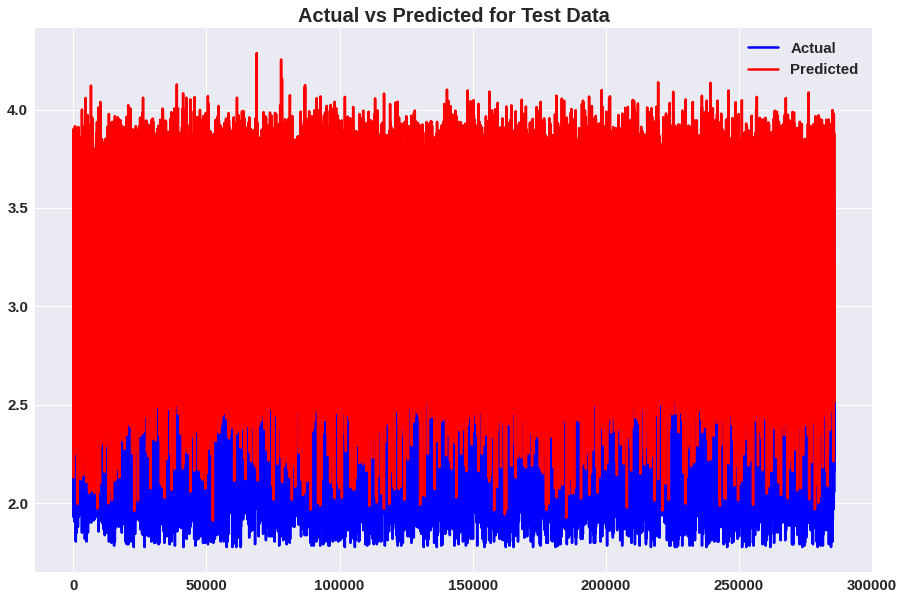

In [227]:
#Actual vs Prediction

c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_lr, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

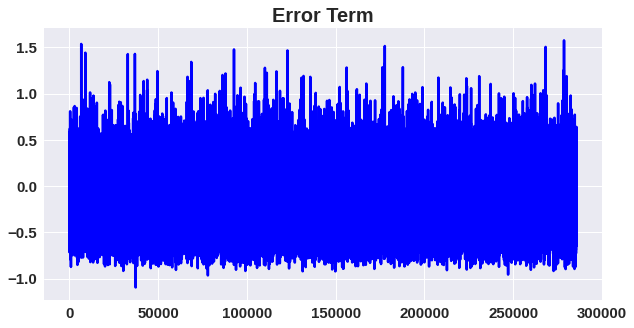

In [228]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_lr, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# **Lasso Regression**

In [229]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [230]:
#Cross validation
lasso = Lasso()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='r2', cv=5)
lasso_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [231]:
print('The best fit alpha value is found out to be :', lasso_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1e-10}
The R2 score using the same alpha is : 0.4832016059843959


In [232]:
y_pred_train_lasso = lasso_regressor.predict(X_train)
y_pred_test_lasso = lasso_regressor.predict(X_test)


In [233]:
# for train data
lasso_train_mse  = mean_squared_error((y_train), (y_pred_train_lasso))
print("Train MSE :" , lasso_train_mse)

lasso_train_rmse = np.sqrt(lasso_train_mse)

print("Train RMSE :" ,lasso_train_rmse)

lasso_train_r2 = r2_score((y_train), (y_pred_train_lasso))
print("Train R2 :" ,lr_train_r2) 

lasso_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_lasso)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)

Train MSE : 0.05107120243890579
Train RMSE : 0.22598938567752644
Train R2 : 0.48323325094637404
Train Adjusted R2 :  0.4832228516057119


In [234]:
lasso_test_mse  = mean_squared_error((y_test), (y_pred_test_lasso))
print("Test MSE :" , lasso_test_mse)

lasso_test_rmse = np.sqrt(lasso_test_mse)

print("Test RMSE :" ,lasso_test_rmse)

lasso_test_r2 = r2_score((y_test), (y_pred_test_lasso))
print("Test R2 :" ,lasso_test_r2)

lasso_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_lasso)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",lr_test_r2_)

Test MSE : 0.05087670291165244
Test RMSE : 0.22555864627996958
Test R2 : 0.48200153199300855
Test Adjusted R2 :  0.4819598329316619


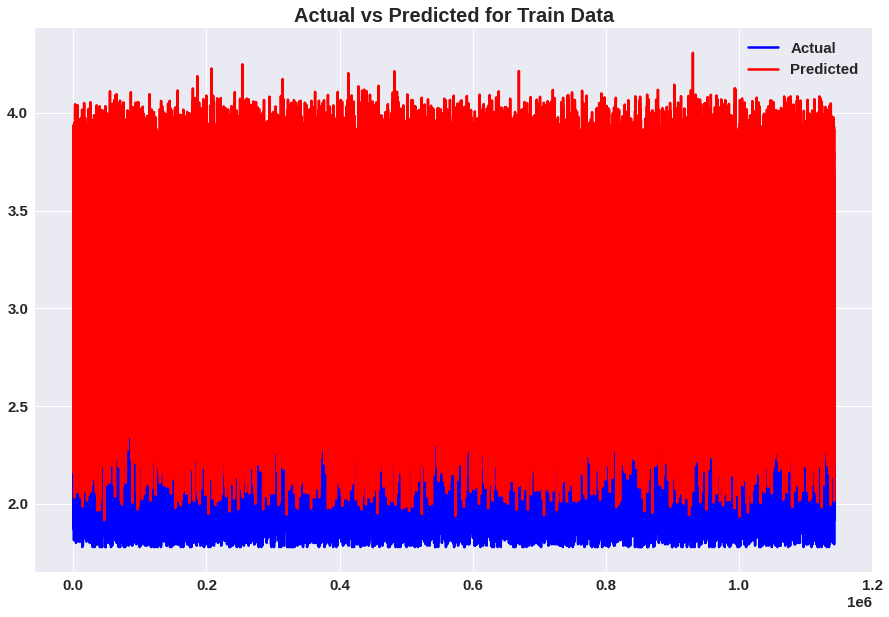

In [235]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_lasso, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

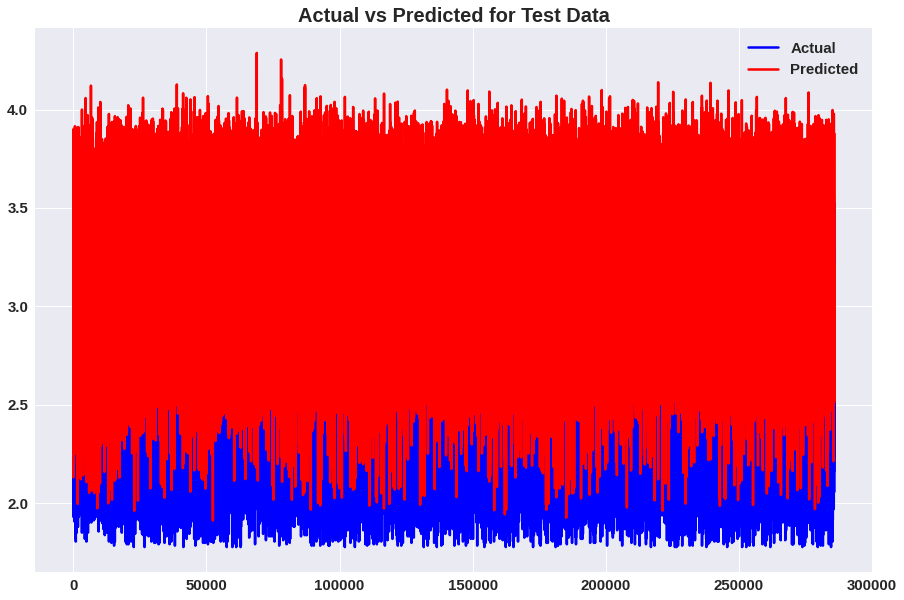

In [236]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_lasso, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Test Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

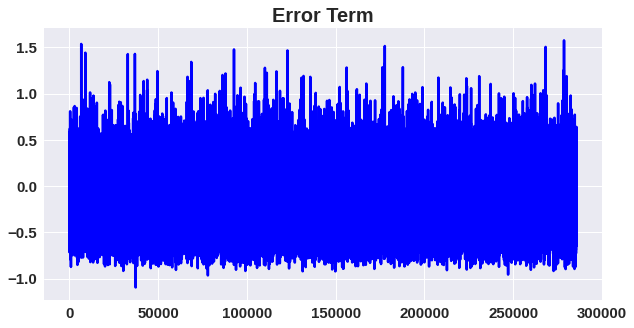

In [237]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_lasso, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# **Ridge**

In [238]:
from sklearn.linear_model import Ridge
#Cross validation
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-13,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1e-1,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='r2', cv=5)
ridge_regressor.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-13, 1e-10, 1e-08, 1e-05, 0.0001,
                                   0.001, 0.01, 0.1, 1, 5, 10, 20, 30, 40, 45,
                                   50, 55, 60, 100]},
             scoring='r2')

In [239]:
print('The best fit alpha value is found out to be :' ,ridge_regressor.best_params_)
print('The R2 score using the same alpha is :', lasso_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}
The R2 score using the same alpha is : 0.4832016059843959


In [240]:
ridge_regressor.best_estimator_

Ridge(alpha=1)

In [241]:
ridge_regressor.score(X_train, y_train)

0.4832332507223678

In [242]:
y_pred_train_ridge = ridge_regressor.predict(X_train)
y_pred_test_ridge = ridge_regressor.predict(X_test)
# for train data
ridge_train_mse  = mean_squared_error((y_train), (y_pred_train_ridge))
print("Train MSE :" , ridge_train_mse)

ridge_train_rmse = np.sqrt(ridge_train_mse)

print("Train RMSE :" ,ridge_train_rmse)

ridge_train_r2 = r2_score((y_train), (y_pred_train_ridge))
print("Train R2 :" ,lr_train_r2) 

ridge_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_ridge)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",lr_train_r2_)
# for test data
ridge_test_mse  = mean_squared_error((y_test), (y_pred_test_ridge))
print("Test MSE :" , ridge_test_mse)

ridge_test_rmse = np.sqrt(ridge_test_mse)

print("Test RMSE :" ,ridge_test_rmse)

ridge_test_r2 = r2_score((y_test), (y_pred_test_ridge))
print("Test R2 :" ,ridge_test_r2)

ridge_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_ridge)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",ridge_test_r2_)

Train MSE : 0.05107120246104399
Train RMSE : 0.22598938572650706
Train R2 : 0.48323325094637404
Train Adjusted R2 :  0.4832228516057119
Test MSE : 0.05087670019130651
Test RMSE : 0.22555864024972866
Test R2 : 0.4820015596900672
Test Adjusted R2 :  0.4819598329316619


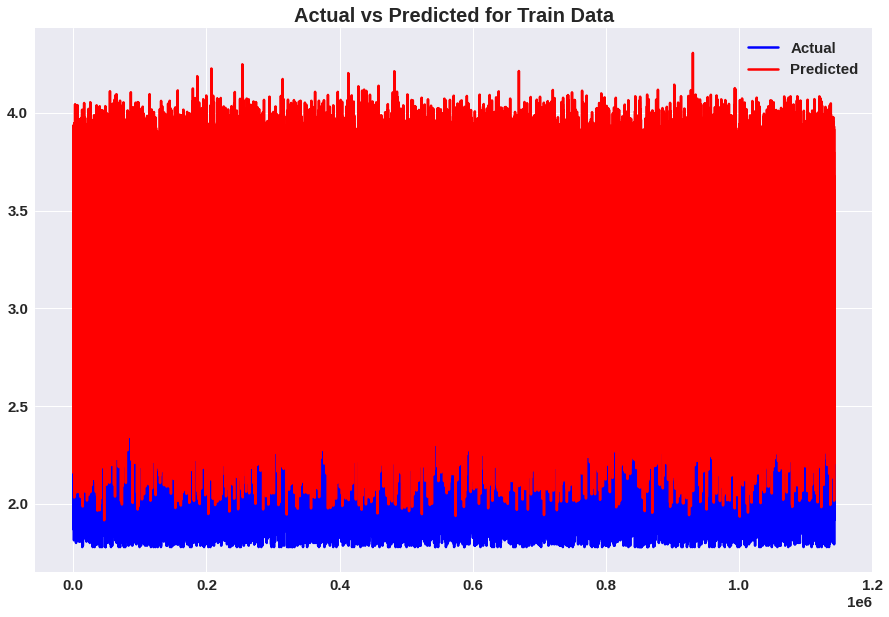

In [243]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_ridge, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

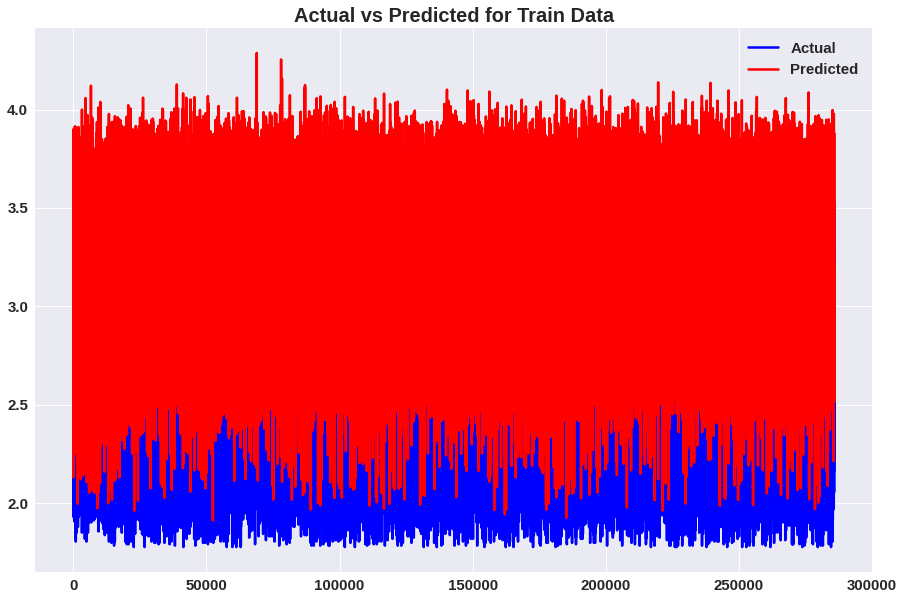

In [244]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_ridge, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

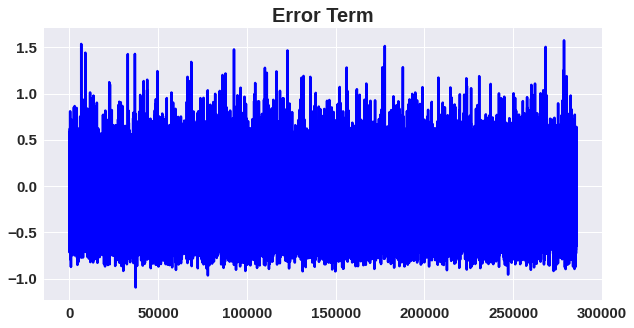

In [245]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_ridge, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# **DecisionTree**

In [246]:
from sklearn.tree import DecisionTreeRegressor

In [247]:
# Maximum depth of trees
max_depth = [4,6,8,10]
 
# Minimum number of samples required to split a node
min_samples_split = [10,20,30]
 
# Minimum number of samples required at each leaf node
min_samples_leaf = [8,16,22]
 
# Hyperparameter Grid
param_dict_dt = {
              'max_depth' : max_depth,
              'min_samples_split' : min_samples_split,
              'min_samples_leaf' : min_samples_leaf}
# best params 
best_dr = {'max_depth': [10], 'min_samples_leaf': [22], 'min_samples_split': [10]}


In [248]:
dtree = DecisionTreeRegressor()
dtree_regr = GridSearchCV(dtree,best_dr, scoring='r2', cv=5)

In [249]:
dtree_regr.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             param_grid={'max_depth': [10], 'min_samples_leaf': [22],
                         'min_samples_split': [10]},
             scoring='r2')

In [250]:
print('The best fit alpha value is found out to be :', dtree_regr.best_params_)
print('The R2 score using the same alpha is :', dtree_regr.best_score_)

The best fit alpha value is found out to be : {'max_depth': 10, 'min_samples_leaf': 22, 'min_samples_split': 10}
The R2 score using the same alpha is : 0.7162464269980847


In [251]:
y_pred_train_dt = dtree_regr.predict(X_train)
y_pred_test_dt = dtree_regr.predict(X_test)

In [252]:
# for train data
dt_train_mse  = mean_squared_error((y_train), (y_pred_train_dt))
print("Train MSE :" , dt_train_mse)

dt_train_rmse = np.sqrt(dt_train_mse)

print("Train RMSE :" ,dt_train_rmse)

dt_train_r2 = r2_score((y_train), (y_pred_train_dt))
print("Train R2 :" ,dt_train_r2) 

dt_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_dt)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",dt_train_r2_)

Train MSE : 0.02763157853276385
Train RMSE : 0.16622749030399228
Train R2 : 0.7204083646419378
Train Adjusted R2 :  0.7204027381795779


In [253]:
dt_test_mse  = mean_squared_error((y_test), (y_pred_test_dt))
print("Test MSE :" , dt_test_mse)

dt_test_rmse = np.sqrt(dt_test_mse)

print("Test RMSE :" ,dt_test_rmse)

dt_test_r2 = r2_score((y_test), (y_pred_test_dt))
print("Test R2 :" ,dt_test_r2)

dt_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_dt)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Test Adjusted R2 : ",dt_test_r2_)

Test MSE : 0.027936316170766855
Test RMSE : 0.16714160514595658
Test R2 : 0.7155678699670248
Test Adjusted R2 :  0.7155449730775212


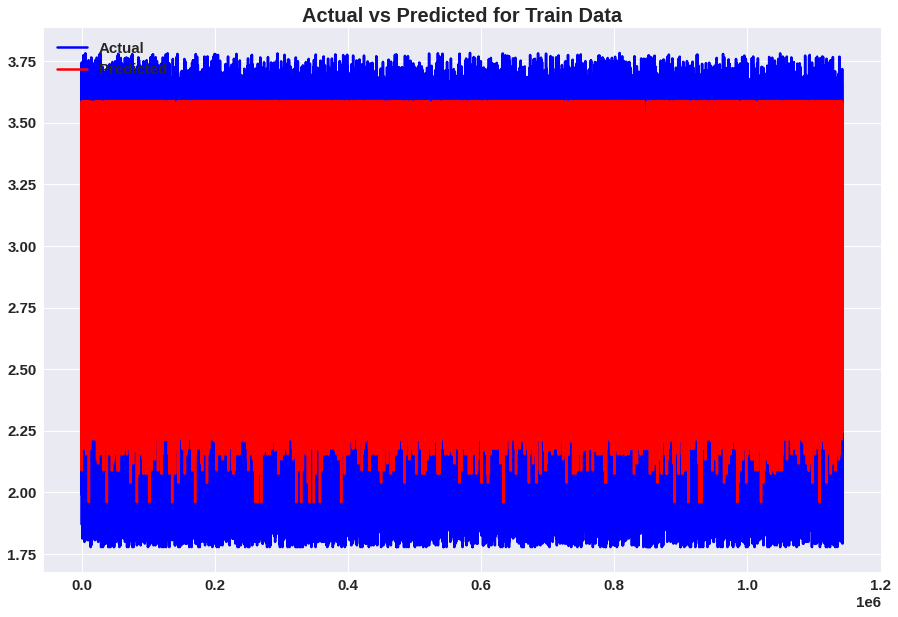

In [254]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_dt, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

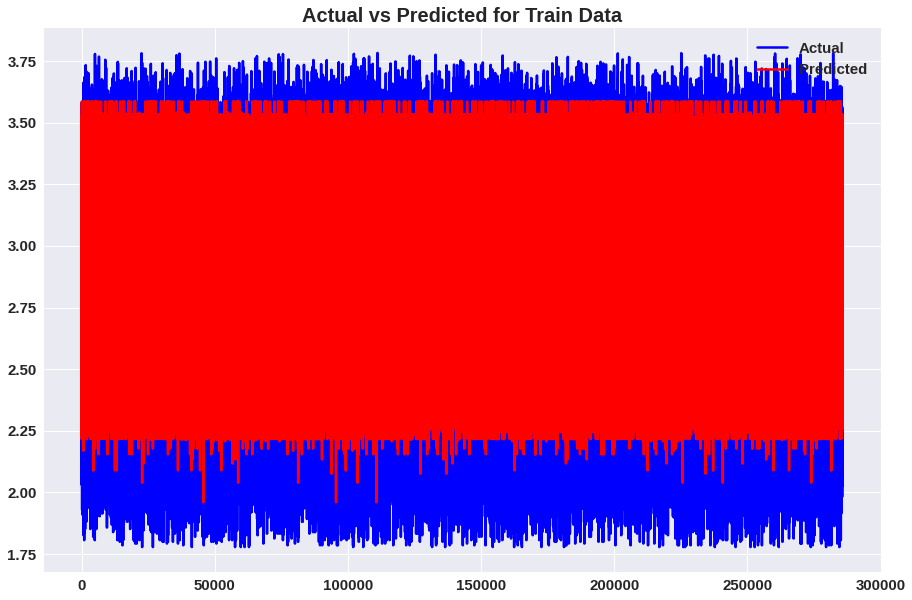

In [255]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_dt, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

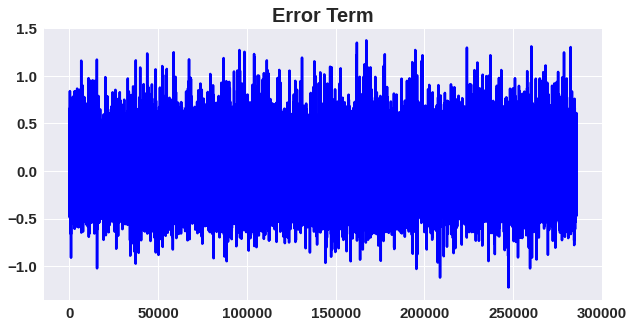

In [256]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_dt, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

# **xgboost**

In [257]:
n_estimators = [80,150,200]
 
# Maximum depth of trees
max_depth = [5,8,10]
min_samples_split = [40,50]
learning_rate=[0.2,0.4,0.6]
 
# Hyperparameter Grid
param_xgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }
# Best parameters found after tuning
best = {'learning_rate': [0.2],
 'max_depth': [10],
 'min_samples_': [40],
 'n_estimators': [200]}

In [258]:
import xgboost as xgb

In [259]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(tree_method = 'hist',silent=1)

# Grid search
xgb_grid = GridSearchCV(estimator=xgb_model,
                        param_grid = best,
                        cv = 3, verbose=1,
                        scoring="r2")

xgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=XGBRegressor(silent=1, tree_method='hist'),
             param_grid={'learning_rate': [0.2], 'max_depth': [10],
                         'min_samples_': [40], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [260]:
xgb_grid.score(X_train,y_train)

0.8755656016121082

In [261]:
y_pred_train_xgb = xgb_grid.predict(X_train)
y_pred_test_xgb = xgb_grid.predict(X_test)

In [262]:
xgb_grid.score(X_test,y_test)

0.8201338505774751

In [263]:
# for train data
xgb_train_mse  = mean_squared_error((y_train), (y_pred_train_xgb))
print("Train MSE :" , xgb_train_mse)

xgb_train_rmse = np.sqrt(xgb_train_mse)

print("Train RMSE :" ,xgb_train_rmse)

xgb_train_r2 = r2_score((y_train), (y_pred_train_xgb))
print("Train R2 :" ,xgb_train_r2) 

xgb_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_xgb)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train Adjusted R2 : ",xgb_train_r2_)

Train MSE : 0.012297645624587208
Train RMSE : 0.11089475021202405
Train R2 : 0.8755656016121082
Train Adjusted R2 :  0.8755630975119483


In [264]:
xgb_test_mse  = mean_squared_error((y_test), (y_pred_test_xgb))
print("Test MSE :" , xgb_test_mse)

xgb_test_rmse = np.sqrt(xgb_test_mse)

print("Test RMSE :" ,xgb_test_rmse)

xgb_test_r2 = r2_score((y_test), (y_pred_test_xgb))
print("Test R2 :" ,xgb_test_r2)

xgb_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_xgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Train Adjusted R2 : ',xgb_test_r2_)

Test MSE : 0.017666068942715815
Test RMSE : 0.13291376506109445
Test R2 : 0.8201338505774751


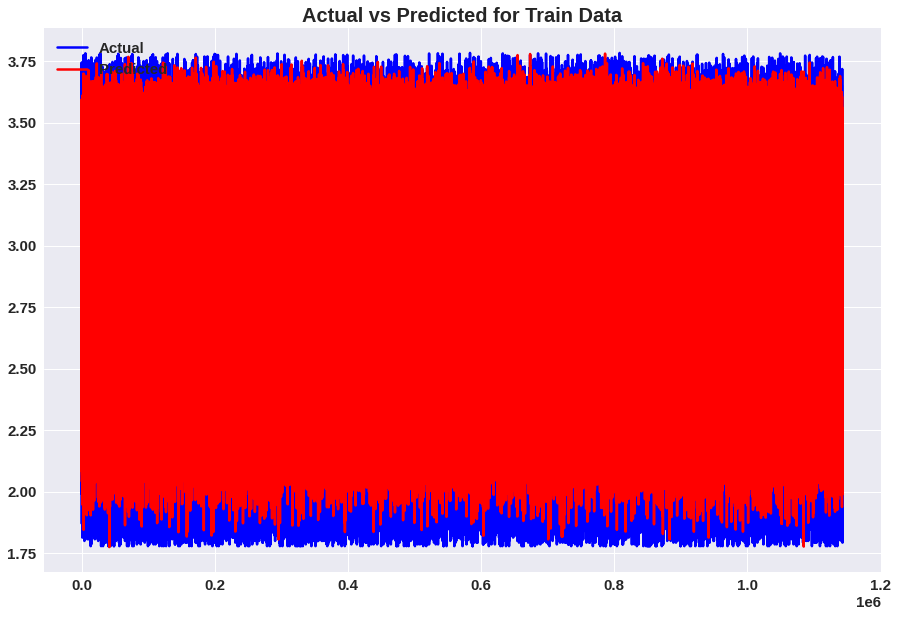

In [265]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_xgb, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

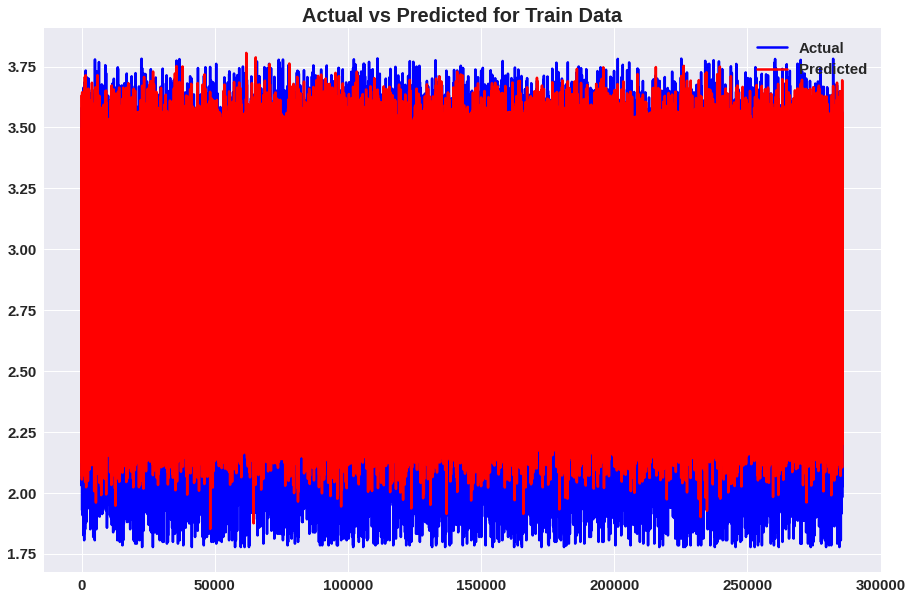

In [266]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_xgb, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

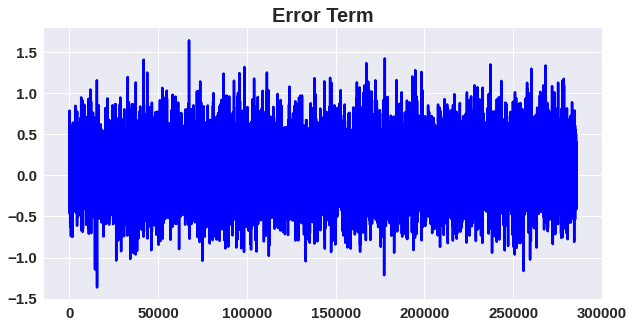

In [267]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_xgb, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

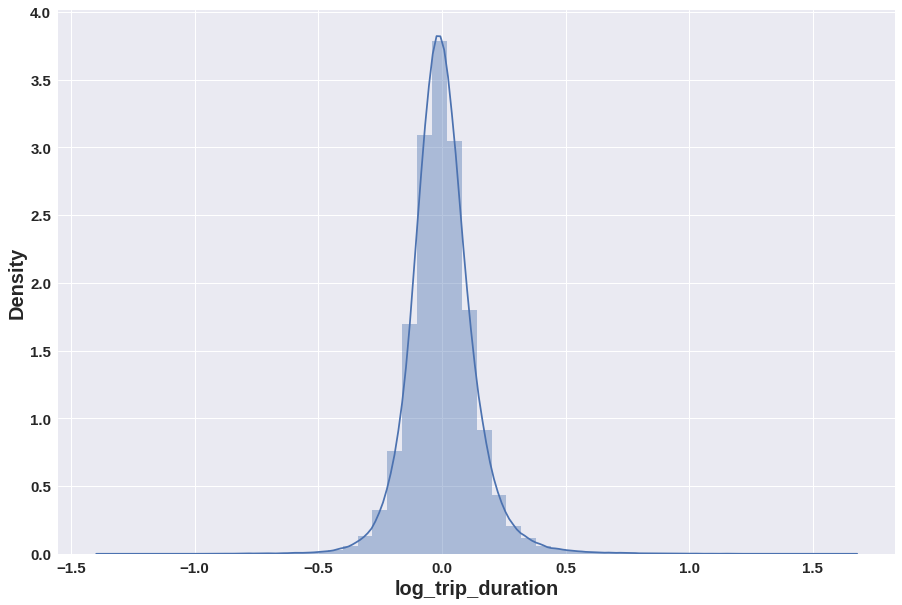

In [268]:
sns.distplot(y_test-y_pred_test_xgb);

# **lgb**

In [269]:
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [ ]:
learning_rate': 0.1,
    'max_depth': 25,
    'num_leaves': 1000, 
    'objective': 'regression',
    'feature_fraction': 0.9,
    'bagging_fraction': 0.5,
    'max_bin': 1000 

In [270]:
n_estimators = [80,150,200]
 
# Maximum depth of trees
max_depth = [5,8,10,50]
min_samples_split = [40,50,100]
learning_rate=[0.2,0.4,0.6]
 
# Hyperparameter Grid
param_lgb = {'n_estimators' : n_estimators,
              'max_depth' : max_depth,
             'min_samples_' : min_samples_split,
             'learning_rate' : learning_rate
             }
# best parameters after evaluating
best_lgb= {'learning_rate': [0.4],
 'max_depth': [50],
 'min_samples_': [40],
 'n_estimators': [200]}

In [271]:
# lgb_grid.best_params_

In [272]:
model = LGBMRegressor()
lgb_grid = GridSearchCV(estimator=model,
                        param_grid = best_lgb,
                        cv = 3, verbose=1,
                        scoring="r2")



In [273]:
lgb_grid.fit(X_train,y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits


GridSearchCV(cv=3, estimator=LGBMRegressor(),
             param_grid={'learning_rate': [0.4], 'max_depth': [50],
                         'min_samples_': [40], 'n_estimators': [200]},
             scoring='r2', verbose=1)

In [274]:
y_pred_train_lgb = lgb_grid.predict(X_train)
y_pred_test_lgb = lgb_grid.predict(X_test)

In [275]:
lgb_grid.score(X_train,y_train)

0.811588217133819

In [276]:
lgb_grid.score(X_test,y_test)

0.8024055083317729

In [277]:
# for train data
lgb_train_mse  = mean_squared_error((y_train), (y_pred_train_lgb))
print("Train MSE :" , lgb_train_mse)

lgb_train_rmse = np.sqrt(lgb_train_mse)

print("Train RMSE :" ,lgb_train_rmse)

lgb_train_r2 = r2_score((y_train), (y_pred_train_lgb))
print("Train R2 :" ,lgb_train_r2) 

lgb_train_r2_ = 1-(1-r2_score((y_train), (y_pred_train_lgb)))*((X_train.shape[0]-1)/(X_train.shape[0]-X_train.shape[1]-1))
print("Train adjusted R2 :" ,lgb_train_r2_)

Train MSE : 0.018620424635013344
Train RMSE : 0.13645667676963757
Train R2 : 0.811588217133819
Train adjusted R2 : 0.8115844255618605


In [278]:
lgb_test_mse  = mean_squared_error((y_test), (y_pred_test_lgb))
print("Test MSE :" , lgb_test_mse)

lgb_test_rmse = np.sqrt(lgb_test_mse)

print("Test RMSE :" ,lgb_test_rmse)

lgb_test_r2 = r2_score((y_test), (y_pred_test_lgb))
print("Test R2 :" ,lgb_test_r2)

lgb_test_r2_ = 1-(1-r2_score((y_test), (y_pred_test_lgb)))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print("Train adjusted R2 :" ,lgb_test_r2_)

Test MSE : 0.019407308844488106
Test RMSE : 0.13931011752377537
Test R2 : 0.8024055083317729
Train adjusted R2 : 0.8023896019036147


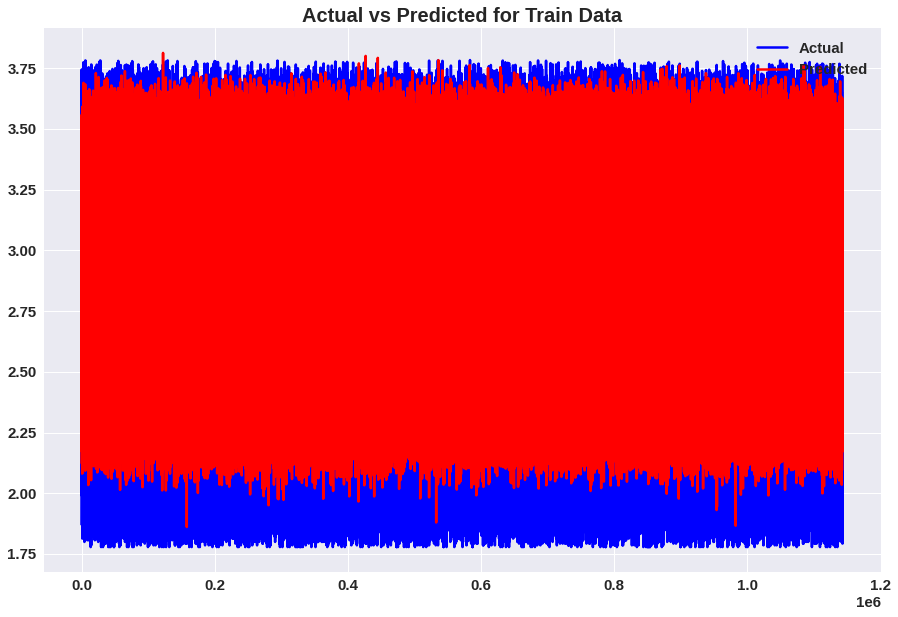

In [279]:
c= [i for i in range(0, len(y_train))]
plt.plot(c, y_train, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_train_lgb, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

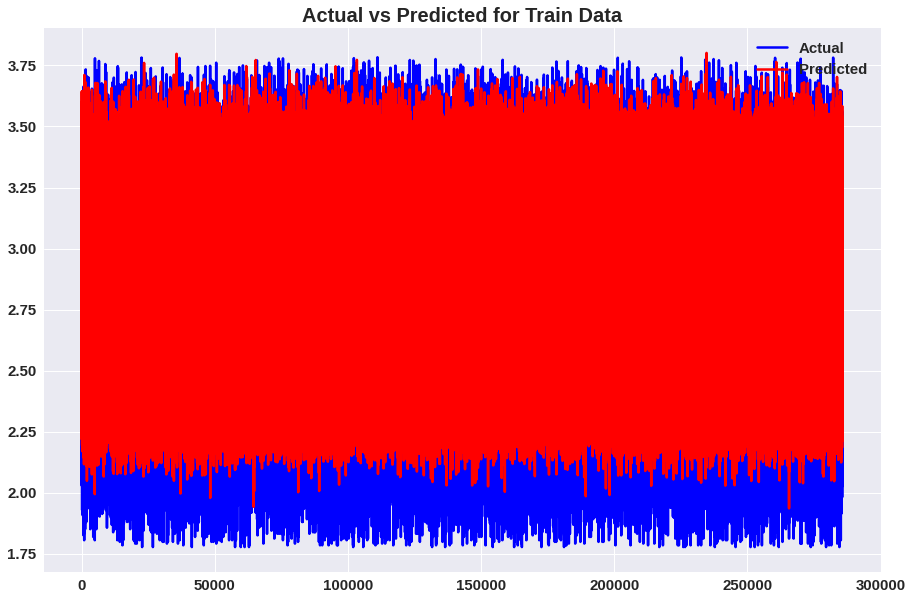

In [280]:
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test, color='blue', linewidth=2.5, linestyle='-')
plt.plot(c, y_pred_test_lgb, color='red', linewidth=2.5, linestyle='-')
plt.title('Actual vs Predicted for Train Data', fontsize=20)
plt.legend(["Actual", "Predicted"])
plt.show()

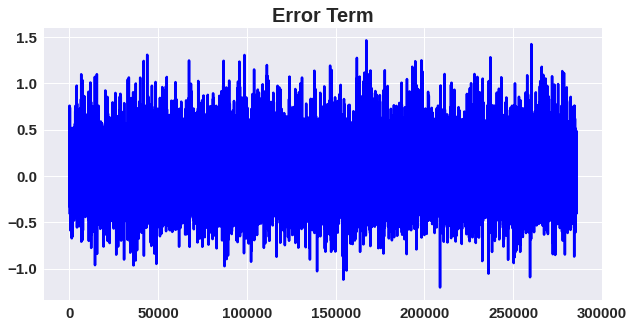

In [281]:
plt.figure(figsize= (10,5))
c= [i for i in range(0, len(y_test))]
plt.plot(c, y_test-y_pred_test_lgb, color='blue', linewidth=2.5, linestyle='-')
plt.title('Error Term', fontsize=20)
plt.show()

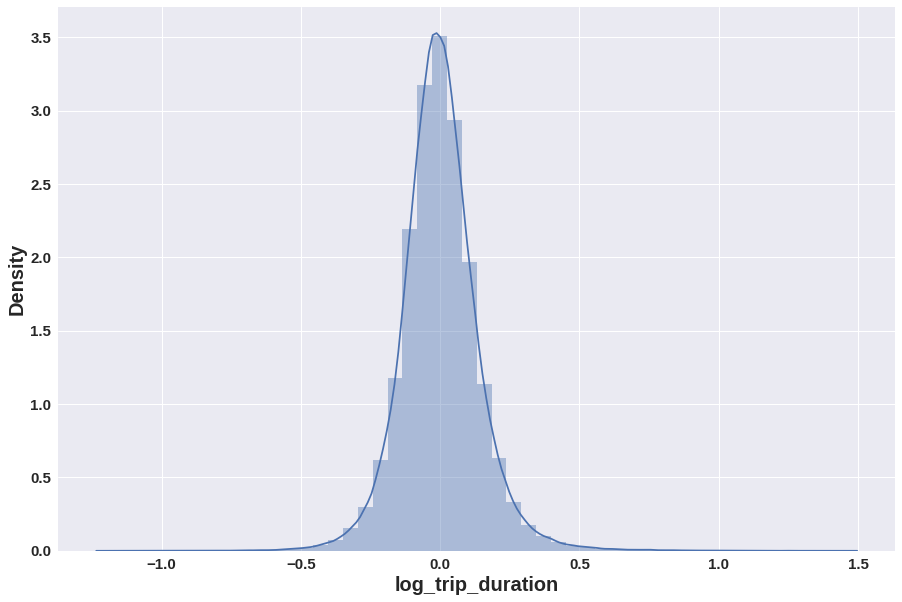

In [282]:
sns.distplot(y_test-y_pred_test_lgb);

* XGboost gives the best r2 score on training data.

In [283]:
xgb_model_1 = xgb.XGBRegressor(tree_method='hist',silent=1,learning_rate= 0.2,max_depth= 10,min_samples_= 40,n_estimators= 200)


In [284]:
xgb_model_1.fit(X_train,y_train)

XGBRegressor(learning_rate=0.2, max_depth=10, min_samples_=40, n_estimators=200,
             silent=1, tree_method='hist')

In [285]:
xgb_model_1.score(X_test,y_test)

0.8201338505774751

In [286]:
! pip install eli5

In [287]:
import eli5 as eli

In [288]:
eli.explain_weights(xgb_model_1)

Weight,Feature
0.5183,pickup_dropoff_distance
0.0777,day_Sunday
0.0620,day_Saturday
0.0602,hour
0.0393,day_Monday
0.0369,dropoff_latitude
0.0211,dropoff_longitude
0.0211,month_January
0.0182,pickup_latitude
0.0181,pickup_longitude


In [289]:
! pip install shapash

In [290]:
# from shapash.explainer.smart_explainer import SmartExplainer
# xpl = SmartExplainer()

In [291]:
# y_pred = pd.DataFrame(xgb_model_1.predict(X_test),columns=['pred'],index=X_test.index)

In [292]:
# xpl.compile(
#     x=X_test[],
#     model=xgb_model_1,
#      # Optional: compile step can use inverse_transform method
#     y_pred=y_pred, # Optional
#     # Optional: see tutorial postprocessing
# )

In [293]:
# app = xpl.run_app()

In [294]:
# xpl.plot.features_importance()

In [295]:
# xpl.plot.contribution_plot("hour")

In [296]:
# xpl.plot.local_plot(331927)

In [297]:
! pip install shap

In [298]:
import shap 
import graphviz

In [299]:
X_train.columns

Index(['vendor_id', 'passenger_count', 'pickup_longitude', 'pickup_latitude',
       'dropoff_longitude', 'dropoff_latitude', 'store_and_fwd_flag', 'day_no',
       'hour', 'minute', 'second', 'pickup_dropoff_distance', 'month_February',
       'month_January', 'month_June', 'month_March', 'month_May', 'day_Monday',
       'day_Saturday', 'day_Sunday', 'day_Thursday', 'day_Tuesday',
       'day_Wednesday'],
      dtype='object')

In [302]:

X_sampled = X_train.sample(100, random_state=10)

In [303]:
explainer = shap.TreeExplainer(xgb_model_1)
shap_values = explainer.shap_values(X_sampled)

In [308]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values[0,:], X_sampled.iloc[0,:])


In [310]:
shap.initjs()
shap.force_plot(explainer.expected_value, shap_values, X_train)

In [314]:
from sklearn.tree import export_graphviz

In [ ]:
# Initialize JavaScript visualizations in notebook environment
shap.initjs()
# De

fine a tree explainer for the built model
explainer = shap.TreeExplainer(xgb_model_1)
# obtain shap values for the first row of the test data
shap_values = explainer.shap_values(X_test)
shap.force_plot(explainer.expected_value, shap_values, X_test) 

In [ ]:
shap_values = shap.TreeExplainer(classifier_dtc).shap_values(X_test)
shap.summary_plot(shap_values[0], X_test)